<a href="https://colab.research.google.com/github/MorningStarTM/Machine_Learning_Examples/blob/main/cat_and_dog_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#unzip the data
from zipfile import ZipFile
with ZipFile("/content/drive/MyDrive/archive - 2022-09-04T142141.405.zip",'r') as ZipImg:
  ZipImg.extractall("/content/drive/MyDrive/")

#Data Preprocessing

In [2]:
train_path = "/content/drive/MyDrive/training_set/training_set/"
test_path = "/content/drive/MyDrive/test_set/test_set/*"

In [3]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import glob
import os
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [4]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

In [5]:
train_batch = train_datagen.flow_from_directory("/content/drive/MyDrive/training_set/training_set/", target_size=(224,224), batch_size=10)
test_batch = test_datagen.flow_from_directory("/content/drive/MyDrive/test_set/test_set/", target_size=(224,224), batch_size=10)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [6]:
#fucntion for plot the images
def Plot_Img(img_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(img_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

In [7]:
img, labels = next(train_batch)

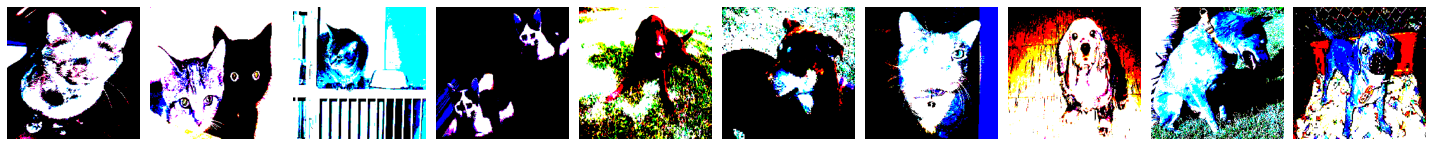

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [8]:
Plot_Img(img)
print(labels)

#Model creation

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 flatten (Flatten)           (None, 802816)            0         
                                                                 
 dense (Dense)               (None, 2)                 1605634   
                                                                 
Total params: 1,625,026
Trainable params: 1,625,026
Non-trainable params: 0
______________________________________________

In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

##training

In [11]:
model.fit(x=train_batch, validation_data=test_batch, epochs=10, verbose=2)

Epoch 1/10
801/801 - 1628s - loss: 6.8422 - accuracy: 0.6327 - val_loss: 0.8743 - val_accuracy: 0.6560 - 1628s/epoch - 2s/step
Epoch 2/10
801/801 - 52s - loss: 0.2289 - accuracy: 0.9141 - val_loss: 0.9049 - val_accuracy: 0.7000 - 52s/epoch - 65ms/step
Epoch 3/10
801/801 - 53s - loss: 0.0289 - accuracy: 0.9949 - val_loss: 1.0073 - val_accuracy: 0.7108 - 53s/epoch - 66ms/step
Epoch 4/10
801/801 - 54s - loss: 0.0105 - accuracy: 0.9983 - val_loss: 1.0633 - val_accuracy: 0.7103 - 54s/epoch - 67ms/step
Epoch 5/10
801/801 - 53s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.1206 - val_accuracy: 0.7173 - 53s/epoch - 66ms/step
Epoch 6/10
801/801 - 55s - loss: 6.1276e-04 - accuracy: 1.0000 - val_loss: 1.1898 - val_accuracy: 0.7212 - 55s/epoch - 68ms/step
Epoch 7/10
801/801 - 52s - loss: 3.0640e-04 - accuracy: 1.0000 - val_loss: 1.2530 - val_accuracy: 0.7177 - 52s/epoch - 65ms/step
Epoch 8/10
801/801 - 52s - loss: 1.7498e-04 - accuracy: 1.0000 - val_loss: 1.3138 - val_accuracy: 0.7202 - 52s/epoc

#Predict

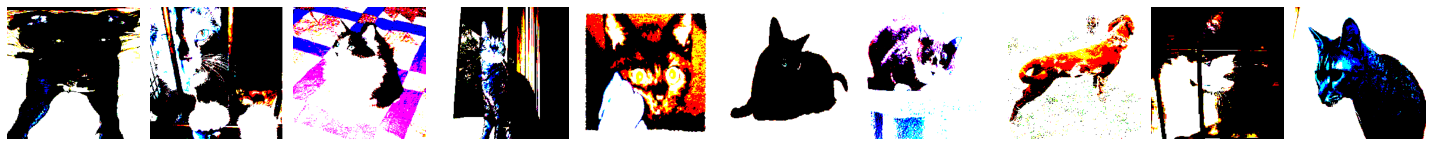

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [12]:
test_img, test_label = next(test_batch)
Plot_Img(test_img)
print(test_label)

In [13]:
test_batch.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [14]:
prediction = model.predict(x=test_batch, verbose=0)

In [15]:
np.around(prediction)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [17]:
cm = confusion_matrix(y_true=test_batch.classes, y_pred=np.argmax(prediction, axis=-1))

In [21]:
import itertools
#plot confusion matrix
def plt_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_mark = np.arange(len(classes))
  plt.xticks(tick_mark, classes, rotation=45)
  plt.yticks(tick_mark, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.axis]
    print("normalized confusion matrix")

  else:
    print("confusion matrix without normalization")
  
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.xlabel("predicted label")
  plt.ylabel("True label")


In [22]:
test_batch.class_indices

{'cats': 0, 'dogs': 1}

confusion matrix without normalization


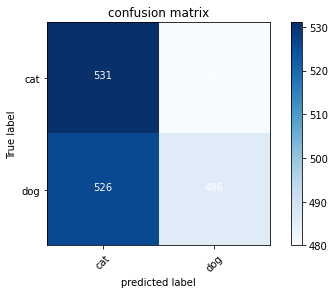

In [23]:
cm_plot_labels = ['cat', 'dog']
plt_confusion_matrix(cm=cm, classes=cm_plot_labels, title="confusion matrix", )